In [77]:
import numpy as np
import pandas as pd
import tensorflow as tf
import random
from keras.layers import Activation, Conv2D, MaxPool2D, Dropout
from keras.layers import Input, Dense, Flatten, concatenate
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, SGD
from keras.models import Model
import matplotlib.pylab as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics

In [78]:
def model_in(size, filternum):
    input1 = Input(shape=size)
    x = Conv2D(filternum, kernel_size = (7, 7), activation = "relu", padding = "same")(input1)
    x = Conv2D(filternum, kernel_size = (7, 7), activation = "relu", padding = "same")(x)
    x = MaxPool2D(pool_size=(2, 2))(x)

    x2 = Conv2D(filternum*2, kernel_size = (7, 7), activation = "relu", padding = "same")(x)
    x2 = Conv2D(filternum*2, kernel_size = (7, 7), activation = "relu", padding = "same")(x2)
    x2 = MaxPool2D(pool_size=(2, 2))(x2)

    x3 = Conv2D(filternum*4, kernel_size = (7, 7), activation = "relu", padding = "same")(x2)
    x3 = Conv2D(filternum*4, kernel_size = (7, 7), activation = "relu", padding = "same")(x3)
    x3 = MaxPool2D(pool_size=(2, 2))(x3)
    
    x4 = Conv2D(filternum*8, kernel_size = (7, 7), activation = "relu", padding = "same")(x3)
    x4 = Conv2D(filternum*8, kernel_size = (7, 7), activation = "relu", padding = "same")(x4)
    x4 = MaxPool2D(pool_size=(2, 2))(x4)

    x5 = Conv2D(filternum*16, kernel_size = (7, 7), activation = "relu", padding = "same")(x4)
    x5 = Conv2D(filternum*16, kernel_size = (7, 7), activation = "relu", padding = "same")(x5)
    x5 = MaxPool2D(pool_size=(2, 2))(x5)

    flat = Flatten()(x5)
    drop = Dropout(0.2)(flat)
    
    #for classification
    dense1 = Dense(units=64, activation="relu")(drop)
    output1 = Dense(units=3, activation="softmax")(dense1)

    #for regression
    dense2 = Dense(units=64, activation="relu")(drop)
    output2 = Dense(units=1, activation="linear")(dense2)
    
    model = Model(inputs = input1, outputs = output1) #for classification
    
    return model

In [79]:
def load_train_data():
    
    ### Load csv ###
    path = "./學生的training_data/training_data.csv"
    data_all = pd.read_csv(path)
    train_path=[]
    regression_truth=[]
    class_truth=[]
    for i in range(len(data_all)):
        a = './學生的training_data/' + data_all.loc[i,'light'] + '/' + data_all.loc[i,'id']
        train_path.append(a)
    for i in range(len(data_all)):
        a = data_all.loc[i,'ground_truth']
        regression_truth.append(a)
    for i in range(len(data_all)):
        a = data_all.loc[i,'grade']
        class_truth.append(a)
    
    ### load img ###
    imgs=[]
    for i in range(len(train_path)):
        img = image.load_img(train_path[i], target_size=(224, 224), color_mode="grayscale")  
        img = image.img_to_array(img)/255
        arr_img = np.expand_dims(img, axis=0)
        imgs.append(arr_img)
        print("loading no.%s image."%i)
        
    train_data = np.concatenate([train_data for train_data in imgs])
    train_data = np.array(train_data)
    
    ### Encode ###
    onehotencoder = OneHotEncoder()
    class_truth = np.array(class_truth).reshape(len(class_truth), 1)
    class_truth = onehotencoder.fit_transform(class_truth).toarray()
    regression_truth = np.array(regression_truth).reshape(len(regression_truth), 1)
    regression_truth = onehotencoder.fit_transform(regression_truth).toarray()
    
    return train_data, regression_truth, class_truth


In [80]:
def batch_generator(X, Y, batch_size = 64):
    indices = np.arange(len(X)) 
    batch=[]
    while True:
            # it might be a good idea to shuffle your data before each epoch
            np.random.shuffle(indices) 
            for i in indices:
                batch.append(i)
                if len(batch)==batch_size:
                    yield X[batch], Y[batch]
                    batch=[]

In [81]:
def train(tr_x,tr_y):
    
    filternum=16
    learning_rate=0.005
    batch_size=64
    epochs=5
    
    train_datagen=ImageDataGenerator(
                             horizontal_flip=True,
                             zca_whitening=True, #做PCA降維
                             data_format='channels_last',
                             )
    
    
    #train_generator = batch_generator(tr_x, tr_y, batch_size = batch_size)
    
    model=  model_in(size=(224, 224, 1), filternum=filternum)
    model.compile(optimizer=SGD(lr=learning_rate), loss ='categorical_crossentropy', metrics=["categorical_accuracy"])
    model.summary()
    
    _history=model.fit_generator(
                train_datagen.flow(tr_x,tr_y,batch_size=64), 
                steps_per_epoch=len(tr_x)/batch_size, 
                epochs=5)

    plt.style.use("ggplot")
    N = epochs
    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(np.arange(0,N),_history.history["loss"])
    plt.xlabel("epoch")
    plt.ylabel("loss")

    plt.subplot(2,1,2)   
    plt.plot(np.arange(0,N),_history.history["categorical_accuracy"])
    plt.xlabel("epoch")
    plt.ylabel("acc")
    
    return model

loading no.0 image.
loading no.1 image.
loading no.2 image.
loading no.3 image.
loading no.4 image.
loading no.5 image.
loading no.6 image.
loading no.7 image.
loading no.8 image.
loading no.9 image.
loading no.10 image.
loading no.11 image.
loading no.12 image.
loading no.13 image.
loading no.14 image.
loading no.15 image.
loading no.16 image.
loading no.17 image.
loading no.18 image.
loading no.19 image.
loading no.20 image.
loading no.21 image.
loading no.22 image.
loading no.23 image.
loading no.24 image.
loading no.25 image.
loading no.26 image.
loading no.27 image.
loading no.28 image.
loading no.29 image.
loading no.30 image.
loading no.31 image.
loading no.32 image.
loading no.33 image.
loading no.34 image.
loading no.35 image.
loading no.36 image.
loading no.37 image.
loading no.38 image.
loading no.39 image.
loading no.40 image.
loading no.41 image.
loading no.42 image.
loading no.43 image.
loading no.44 image.
loading no.45 image.
loading no.46 image.
loading no.47 image.
lo

loading no.378 image.
loading no.379 image.
loading no.380 image.
loading no.381 image.
loading no.382 image.
loading no.383 image.
loading no.384 image.
loading no.385 image.
loading no.386 image.
loading no.387 image.
loading no.388 image.
loading no.389 image.
loading no.390 image.
loading no.391 image.
loading no.392 image.
loading no.393 image.
loading no.394 image.
loading no.395 image.
loading no.396 image.
loading no.397 image.
loading no.398 image.
loading no.399 image.
loading no.400 image.
loading no.401 image.
loading no.402 image.
loading no.403 image.
loading no.404 image.
loading no.405 image.
loading no.406 image.
loading no.407 image.
loading no.408 image.
loading no.409 image.
loading no.410 image.
loading no.411 image.
loading no.412 image.
loading no.413 image.
loading no.414 image.
loading no.415 image.
loading no.416 image.
loading no.417 image.
loading no.418 image.
loading no.419 image.
loading no.420 image.
loading no.421 image.
loading no.422 image.
loading no

loading no.752 image.
loading no.753 image.
loading no.754 image.
loading no.755 image.
loading no.756 image.
loading no.757 image.
loading no.758 image.
loading no.759 image.
loading no.760 image.
loading no.761 image.
loading no.762 image.
loading no.763 image.
loading no.764 image.
loading no.765 image.
loading no.766 image.
loading no.767 image.
loading no.768 image.
loading no.769 image.
loading no.770 image.
loading no.771 image.
loading no.772 image.
loading no.773 image.
loading no.774 image.
loading no.775 image.
loading no.776 image.
loading no.777 image.
loading no.778 image.
loading no.779 image.
loading no.780 image.
loading no.781 image.
loading no.782 image.
loading no.783 image.
loading no.784 image.
loading no.785 image.
loading no.786 image.
loading no.787 image.
loading no.788 image.
loading no.789 image.
loading no.790 image.
loading no.791 image.
loading no.792 image.
loading no.793 image.
loading no.794 image.
loading no.795 image.
loading no.796 image.
loading no

loading no.1120 image.
loading no.1121 image.
loading no.1122 image.
loading no.1123 image.
loading no.1124 image.
loading no.1125 image.
loading no.1126 image.
loading no.1127 image.
loading no.1128 image.
loading no.1129 image.
loading no.1130 image.
loading no.1131 image.
loading no.1132 image.
loading no.1133 image.
loading no.1134 image.
loading no.1135 image.
loading no.1136 image.
loading no.1137 image.
loading no.1138 image.
loading no.1139 image.
loading no.1140 image.
loading no.1141 image.
loading no.1142 image.
loading no.1143 image.
loading no.1144 image.
loading no.1145 image.
loading no.1146 image.
loading no.1147 image.
loading no.1148 image.
loading no.1149 image.
loading no.1150 image.
loading no.1151 image.
loading no.1152 image.
loading no.1153 image.
loading no.1154 image.
loading no.1155 image.
loading no.1156 image.
loading no.1157 image.
loading no.1158 image.
loading no.1159 image.
loading no.1160 image.
loading no.1161 image.
loading no.1162 image.
loading no.

loading no.1478 image.
loading no.1479 image.
loading no.1480 image.
loading no.1481 image.
loading no.1482 image.
loading no.1483 image.
loading no.1484 image.
loading no.1485 image.
loading no.1486 image.
loading no.1487 image.
loading no.1488 image.
loading no.1489 image.
loading no.1490 image.
loading no.1491 image.
loading no.1492 image.
loading no.1493 image.
loading no.1494 image.
loading no.1495 image.
loading no.1496 image.
loading no.1497 image.
loading no.1498 image.
loading no.1499 image.
loading no.1500 image.
loading no.1501 image.
loading no.1502 image.
loading no.1503 image.
loading no.1504 image.
loading no.1505 image.
loading no.1506 image.
loading no.1507 image.
loading no.1508 image.
loading no.1509 image.
loading no.1510 image.
loading no.1511 image.
loading no.1512 image.
loading no.1513 image.
loading no.1514 image.
loading no.1515 image.
loading no.1516 image.
loading no.1517 image.
loading no.1518 image.
loading no.1519 image.
loading no.1520 image.
loading no.

loading no.1836 image.
loading no.1837 image.
loading no.1838 image.
loading no.1839 image.
loading no.1840 image.
loading no.1841 image.
loading no.1842 image.
loading no.1843 image.
loading no.1844 image.
loading no.1845 image.
loading no.1846 image.
loading no.1847 image.
loading no.1848 image.
loading no.1849 image.
loading no.1850 image.
loading no.1851 image.
loading no.1852 image.
loading no.1853 image.
loading no.1854 image.
loading no.1855 image.
loading no.1856 image.
loading no.1857 image.
loading no.1858 image.
loading no.1859 image.
loading no.1860 image.
loading no.1861 image.
loading no.1862 image.
loading no.1863 image.
loading no.1864 image.
loading no.1865 image.
loading no.1866 image.
loading no.1867 image.
loading no.1868 image.
loading no.1869 image.
loading no.1870 image.
loading no.1871 image.
loading no.1872 image.
loading no.1873 image.
loading no.1874 image.
loading no.1875 image.
loading no.1876 image.
loading no.1877 image.
loading no.1878 image.
loading no.

D:\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
D:\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
D:\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 1)]     0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 224, 224, 16)      800       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 224, 224, 16)      12560     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 112, 112, 32)      25120     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 112, 112, 32)      50208     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 56, 56, 32)       

D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


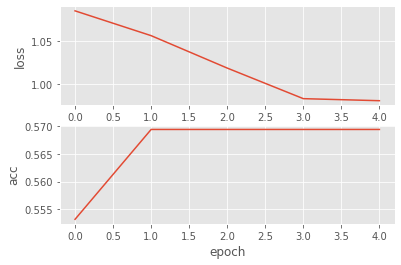

In [82]:
if __name__ == "__main__":
    
    train_data, regression_truth, class_truth = load_train_data()
    
    x_train, x_test, y_train, y_test = train_test_split(train_data, class_truth, test_size = 0.3, shuffle = True)
    
    train_model = train(x_train,y_train)
    
    train_model.save('my_model.h5')
    
    
    ###validation###
    
    predict = train_model.predict(x_test)
    
    real = np.zeros(y_test.shape[0], dtype=int)
    pred = np.zeros(predict.shape[0], dtype=int)
    for i in range(predict.shape[0]):
        real[i] = np.argmax(y_test[i])
        pred[i] = np.argmax(predict[i])

    accuracy = metrics.accuracy_score(real, pred)
    matrix = metrics.confusion_matrix(real, pred)
    print (matrix)
    print (accuracy)
    print(classification_report(real, pred))
    
    

# testing

In [83]:
test_csv_path = "./學生的testing_data/testing_data.csv"
test_csv = pd.read_csv(test_csv_path)
test_img_path=[]    

for i in range(len(test_csv)):
    a = './學生的testing_data/' + 'testing_data/' + test_csv.loc[i,'id']
    test_img_path.append(a)
        
        
test_imgs=[]
for i in range(len(test_img_path)):
    img = image.load_img(test_img_path[i], target_size=(224, 224), color_mode="grayscale")
    img = image.img_to_array(img)/255
    img = np.expand_dims(img, axis=0)
    test_imgs.append(img)
    print("loading no.%s test image."%i)
        
test_data = np.concatenate([test_data for test_data in test_imgs])
test_data = np.array(test_data)

loading no.0 test image.
loading no.1 test image.
loading no.2 test image.
loading no.3 test image.
loading no.4 test image.
loading no.5 test image.
loading no.6 test image.
loading no.7 test image.
loading no.8 test image.
loading no.9 test image.
loading no.10 test image.
loading no.11 test image.
loading no.12 test image.
loading no.13 test image.
loading no.14 test image.
loading no.15 test image.
loading no.16 test image.
loading no.17 test image.
loading no.18 test image.
loading no.19 test image.
loading no.20 test image.
loading no.21 test image.
loading no.22 test image.
loading no.23 test image.
loading no.24 test image.
loading no.25 test image.
loading no.26 test image.
loading no.27 test image.
loading no.28 test image.
loading no.29 test image.
loading no.30 test image.
loading no.31 test image.
loading no.32 test image.
loading no.33 test image.
loading no.34 test image.
loading no.35 test image.
loading no.36 test image.
loading no.37 test image.
loading no.38 test ima

In [84]:
predict=train_model.predict(test_data)
pred = np.zeros(predict.shape[0], dtype=int)

for i in range(predict.shape[0]):
    pred[i] = np.argmax(predict[i])
    
pred_class = pred+1
pred_class = pd.DataFrame(pred_class)
pred_class.to_csv("./Results.csv")